# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
df = pd.read_csv('data/WHR2018Chapter2OnlineData.csv')

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Create Labels

In [4]:
# Create binary variable to be label
df['LL_bool'] = df['Life Ladder'].apply(lambda x: True if x > 5 else False)
df['LL_bool'].value_counts(normalize=True, dropna=False)
# Sufficient data for both categories, no null values

True     0.618438
False    0.381562
Name: LL_bool, dtype: float64

### Clean the data

In [5]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [6]:
df.rename({
    'Standard deviation of ladder by country-year': 'stdev',
    'Standard deviation/Mean of ladder by country-year': 'stdev-div-mean',
    'GINI index (World Bank estimate)': 'gini',
    'GINI index (World Bank estimate), average 2000-15': 'gini-2000-15',
    'gini of household income reported in Gallup, by wp5-year': 'gini-gallup',
}, axis=1, inplace=True)

Find and replace outliers

<AxesSubplot:xlabel='Log GDP per capita'>

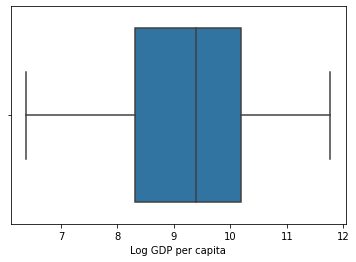

In [7]:
sns.boxplot(x=df['Log GDP per capita'])

<AxesSubplot:xlabel='Social support'>

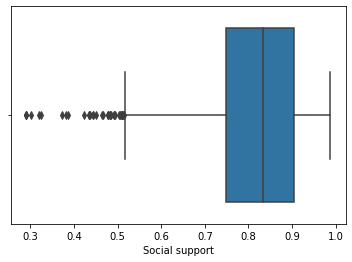

In [35]:
sns.boxplot(x=df['Social support'])

<AxesSubplot:xlabel='Healthy life expectancy at birth'>

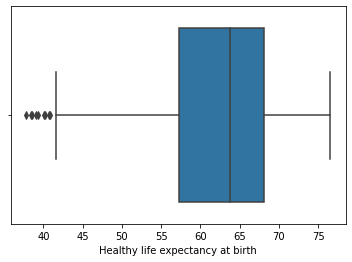

In [12]:
sns.boxplot(x=df['Healthy life expectancy at birth'])

<AxesSubplot:xlabel='Freedom to make life choices'>

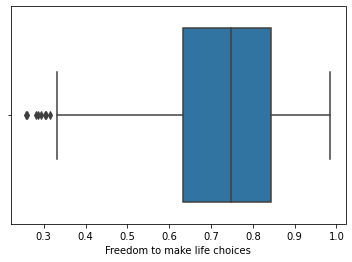

In [13]:
sns.boxplot(x=df['Freedom to make life choices'])

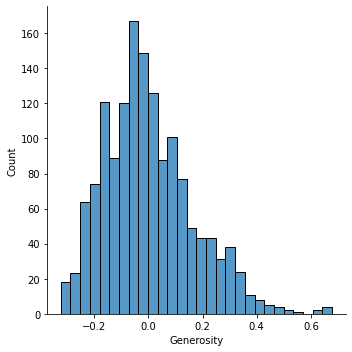

In [15]:
sns.displot(x=df['Generosity'])

<AxesSubplot:xlabel='Perceptions of corruption'>

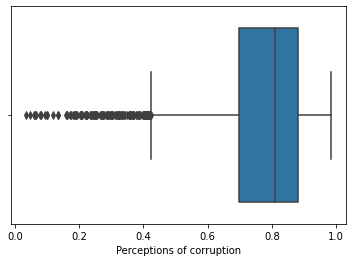

In [17]:
sns.boxplot(x=df['Perceptions of corruption'])

<AxesSubplot:xlabel='Positive affect'>

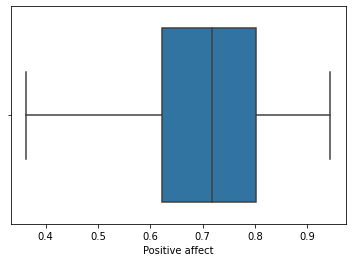

In [18]:
sns.boxplot(x=df['Positive affect'])

<AxesSubplot:xlabel='Negative affect'>

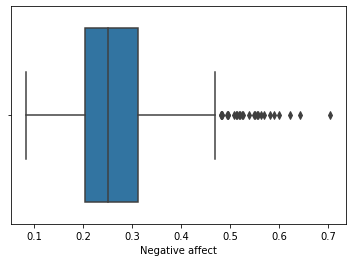

In [19]:
sns.boxplot(x=df['Negative affect'])

<AxesSubplot:xlabel='Confidence in national government'>

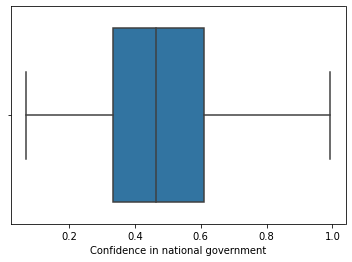

In [20]:
sns.boxplot(x=df['Confidence in national government'])

<AxesSubplot:xlabel='Democratic Quality'>

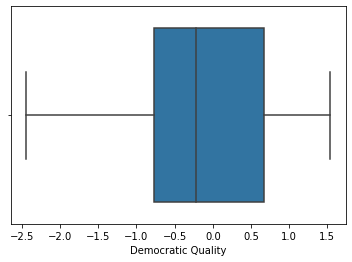

In [21]:
sns.boxplot(x=df['Democratic Quality'])

<AxesSubplot:xlabel='Standard deviation of ladder by country-year'>

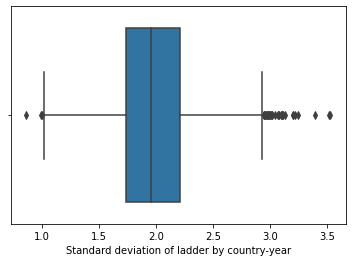

In [22]:
sns.boxplot(x=df['Standard deviation of ladder by country-year'])

In [7]:
df['Social support-win'] = stats.mstats.winsorize(df['Social support'], limits=[0.01, 0.01])

In [8]:
df['Negative affect-win'] = stats.mstats.winsorize(df['Negative affect'], limits=[0.01, 0.01])

Find and replace missing values

In [9]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

gini                                 0.626761
gini-gallup                          0.228553
gini-2000-15                         0.112676
Delivery Quality                     0.109475
Democratic Quality                   0.109475
Confidence in national government    0.103073
Perceptions of corruption            0.057618
Generosity                           0.051216
Freedom to make life choices         0.018566
Log GDP per capita                   0.017286
Positive affect                      0.011524
Social support                       0.008323
Negative affect                      0.007682
Healthy life expectancy at birth     0.005762
year                                 0.000000
Life Ladder                          0.000000
Negative affect-win                  0.000000
Social support-win                   0.000000
stdev                                0.000000
stdev-div-mean                       0.000000
LL_bool                              0.000000
country                           

I will have to just drop the gini column

In [10]:
df.drop('gini', axis=1, inplace=True)

In [11]:
# Fill all null values
cols = df.columns.tolist()
cols.remove('country')
for col in cols:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

Get X and y training and test sets

In [12]:
y = df['LL_bool']
X = df.drop(columns = ['LL_bool', 'country', 'year', 'Life Ladder', 'Social support', 'Negative affect'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [14]:
print(X_train.size)
print(X_test.size)

16395
7035


Train a Decision Tree model

In [15]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score

In [17]:
max_depth_range = [8, 32]
leaf_range = [1, 2, 3, 4]

acc = []
best_score = 0
best_md = 8
best_leaf = 1

for md in max_depth_range:
    for leaf in leaf_range:
        score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
        print('Max Depth=' + str(md) + ', Leaf=' + str(leaf) + ', accuracy score: ' + str(score))
        acc.append(float(score))
        if score > best_score:
            best_score = score
            best_md = md
            best_leaf = leaf
print("")
print("Best max depth: " + str(best_md))
print("Best leaf: " + str(best_leaf))

Max Depth=8, Leaf=1, accuracy score: 0.9275053304904051
Max Depth=8, Leaf=2, accuracy score: 0.9104477611940298
Max Depth=8, Leaf=3, accuracy score: 0.9125799573560768
Max Depth=8, Leaf=4, accuracy score: 0.929637526652452
Max Depth=32, Leaf=1, accuracy score: 0.9381663113006397
Max Depth=32, Leaf=2, accuracy score: 0.9211087420042644
Max Depth=32, Leaf=3, accuracy score: 0.9147121535181236
Max Depth=32, Leaf=4, accuracy score: 0.9253731343283582

Best max depth: 32
Best leaf: 1


Find the most important features

In [18]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_md, min_samples_leaf=best_leaf)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=32, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
fi = model_dt.feature_importances_
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]
names_sorted

['Healthy life expectancy at birth',
 'stdev-div-mean',
 'stdev',
 'Log GDP per capita',
 'Positive affect',
 'Social support-win',
 'Democratic Quality',
 'gini-2000-15',
 'Delivery Quality',
 'Confidence in national government',
 'Negative affect-win',
 'gini-gallup',
 'Generosity',
 'Perceptions of corruption',
 'Freedom to make life choices']

Text(0, 0.5, 'Normalized importance')

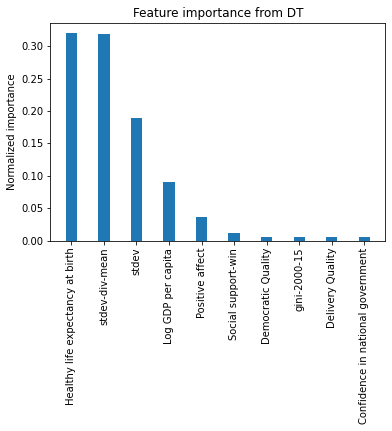

In [21]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(fi, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

Train a KNN model

In [22]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    model = KNeighborsClassifier(n_neighbors=k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test) 

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score

In [23]:
k_values = range(1,41)

acc = [] 
best_score = 0
best_k = 1

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc.append(float(score))
    if score > best_score:
        best_score = score
        best_k = k

print("")
print("Best k: " + str(best_k))

k=1, accuracy score: 0.8699360341151386
k=2, accuracy score: 0.8614072494669509
k=3, accuracy score: 0.8805970149253731
k=4, accuracy score: 0.8678038379530917
k=5, accuracy score: 0.8763326226012793
k=6, accuracy score: 0.8635394456289979
k=7, accuracy score: 0.8571428571428571
k=8, accuracy score: 0.8592750533049041
k=9, accuracy score: 0.8635394456289979
k=10, accuracy score: 0.8656716417910447
k=11, accuracy score: 0.8571428571428571
k=12, accuracy score: 0.8592750533049041
k=13, accuracy score: 0.8528784648187633
k=14, accuracy score: 0.8507462686567164
k=15, accuracy score: 0.8443496801705757
k=16, accuracy score: 0.8464818763326226
k=17, accuracy score: 0.8464818763326226
k=18, accuracy score: 0.8400852878464818
k=19, accuracy score: 0.8443496801705757
k=20, accuracy score: 0.8422174840085288
k=21, accuracy score: 0.8422174840085288
k=22, accuracy score: 0.8422174840085288
k=23, accuracy score: 0.8336886993603412
k=24, accuracy score: 0.8336886993603412
k=25, accuracy score: 0.8

Try with only the best features

In [24]:
best_features = names_sorted[:10]

k_values = range(1,41)

acc = [] 
best_score = 0
best_k = 1

for k in k_values:
    score = train_test_knn(X_train[best_features], X_test[best_features], y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc.append(float(score))
    if score > best_score:
        best_score = score
        best_k = k

print("")
print("Best k: " + str(best_k))

k=1, accuracy score: 0.8614072494669509
k=2, accuracy score: 0.8507462686567164
k=3, accuracy score: 0.8805970149253731
k=4, accuracy score: 0.8592750533049041
k=5, accuracy score: 0.8656716417910447
k=6, accuracy score: 0.8614072494669509
k=7, accuracy score: 0.8550106609808102
k=8, accuracy score: 0.8550106609808102
k=9, accuracy score: 0.8571428571428571
k=10, accuracy score: 0.8635394456289979
k=11, accuracy score: 0.8486140724946695
k=12, accuracy score: 0.8528784648187633
k=13, accuracy score: 0.8486140724946695
k=14, accuracy score: 0.8528784648187633
k=15, accuracy score: 0.8486140724946695
k=16, accuracy score: 0.8422174840085288
k=17, accuracy score: 0.8443496801705757
k=18, accuracy score: 0.8422174840085288
k=19, accuracy score: 0.835820895522388
k=20, accuracy score: 0.835820895522388
k=21, accuracy score: 0.837953091684435
k=22, accuracy score: 0.837953091684435
k=23, accuracy score: 0.8272921108742004
k=24, accuracy score: 0.835820895522388
k=25, accuracy score: 0.831556

The DT model is more accurate. Perform model selection to pick the best DT model.

In [27]:
hyperparams = [2**n for n in range(2,6)]
hyperparams

[4, 8, 16, 32]

In [30]:
print('Running k-fold Cross-Validation...')

accuracy_scores = []


for md in hyperparams:
    
    model = DecisionTreeClassifier(max_depth=md, min_samples_leaf=1)
    # Perform k-fold cross-validation
    acc_score = cross_val_score(model, X_train, y_train, cv=5)
    acc_mean = acc_score.mean()
    accuracy_scores.append(acc_mean)
    
    
print('Done\n')

for s in range(len(accuracy_scores)):
    print('Accuracy score for max_depth {0}: {1}'.format(hyperparams[s], accuracy_scores[s]))

Running k-fold Cross-Validation...
Done

Accuracy score for max_depth 4: 0.8984290561769512
Accuracy score for max_depth 8: 0.9093879602865401
Accuracy score for max_depth 16: 0.9075656654518035
Accuracy score for max_depth 32: 0.9039126974152737


In [31]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 1)
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)

print(acc_score)

0.906183368869936


In [32]:
# Perform 5-fold cross-validation on the training data
print('Running Cross-Validation...')

accuracy_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Done')

print('Accuracies for the five training/test iterations on the validation sets:')
print(accuracy_scores)

Running Cross-Validation...
Done
Accuracies for the five training/test iterations on the validation sets:
[0.91780822 0.93150685 0.93607306 0.86697248 0.92201835]


In [33]:
print('Running Validation Curve Implementation...')

model = DecisionTreeClassifier()

hyperparams = [2**n for n in range(2,6)]

training_scores, validation_scores = validation_curve(model, X_train, y_train,
                                       param_name = "max_depth",
                                       param_range = hyperparams,
                                        cv = 5)

print('Done\n')

print(validation_scores)

Running Validation Curve Implementation...
Done

[[0.88584475 0.91780822 0.9086758  0.87614679 0.90366972]
 [0.90410959 0.91780822 0.93607306 0.88073394 0.91284404]
 [0.89041096 0.91324201 0.92694064 0.87155963 0.91284404]
 [0.91324201 0.93150685 0.91324201 0.88073394 0.92201835]]


In [34]:
mean_validation_scores = np.mean(validation_scores, axis = 1)
for h in range(0, len(hyperparams)):
    print('Results of cross-validation for max_depth of {0}: {1}'.format(hyperparams[h], mean_validation_scores[h]))

Results of cross-validation for max_depth of 4: 0.8984290561769512
Results of cross-validation for max_depth of 8: 0.910313769846257
Results of cross-validation for max_depth of 16: 0.9029994554061413
Results of cross-validation for max_depth of 32: 0.912148632231578


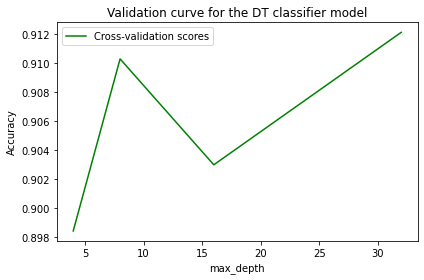

In [35]:
sns.lineplot(x=hyperparams, y=mean_validation_scores, label = "Cross-validation scores", color = 'g')

plt.title("Validation curve for the DT classifier model")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')

plt.show()

In [39]:
hyperparams_depth = [2**n for n in range(2,6)]

# Do the same for leaf
hyperparams_leaf = [1,4]
hyperparams_leaf.extend([25*2**n for n in range(0,3)])

# Create parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf}
param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [1, 4, 25, 50, 100]}

In [40]:
print('Running Grid Search...')

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [48]:
# best-performing hyperparameter configuration
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

# best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Optimal hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1}
Accuracy score: 0.9139583595157303


In [49]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 1)
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)

print(acc_score)

0.8955223880597015


In [50]:
fi = model.feature_importances_
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]
names_sorted

['Healthy life expectancy at birth',
 'stdev-div-mean',
 'stdev',
 'Log GDP per capita',
 'Negative affect-win',
 'gini-gallup',
 'gini-2000-15',
 'Perceptions of corruption',
 'Democratic Quality',
 'Confidence in national government',
 'Positive affect',
 'Social support-win',
 'Freedom to make life choices',
 'Delivery Quality',
 'Generosity']

Text(0, 0.5, 'Normalized importance')

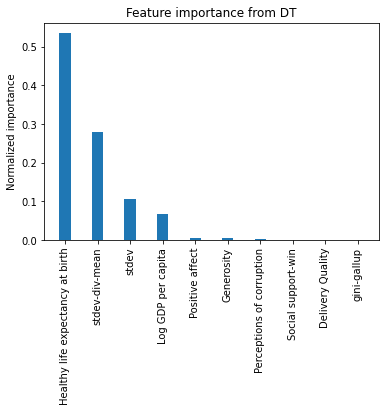

In [60]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(fi, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

In [45]:
probs = model.predict_proba(X_test)
proba_predictions = []
for p in probs:
    proba_predictions.append(p[1])

class_label_predictions = model.predict(X_test)

In [46]:
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])
c_m

array([[249,  23],
       [ 39, 158]])

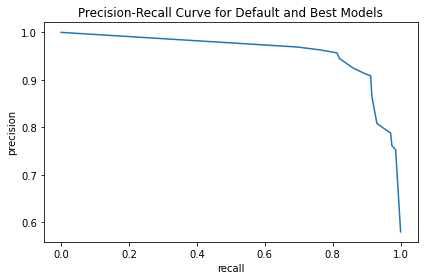

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, proba_predictions)
sns.lineplot(x=recall, y=precision)

plt.title("Precision-Recall Curve for Default and Best Models")
plt.xlabel("recall")
plt.ylabel("precision")
plt.tight_layout()

plt.show()